In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
# from tqdm.auto import tqdm
from IPython.display import clear_output

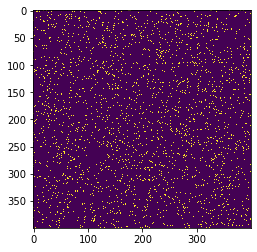

In [2]:
# generate a random starting array

# percentage of pixels that start off alive
alive_pct = 0.05

# build random array
field = np.random.randint(0,round(1/alive_pct),[400,400])==1

# display array 
plt.imshow(field, interpolation='none')
plt.show()

In [3]:
# without numba this is very slow
@jit(nopython=True) 
def count_arround(field):
    results_list = []
    rows,cols = field.shape
    search_area = [-1,0,1]
    row_count = 0
    for row in field:
        cell_count = 0
        
        for cell in row:
            neighbors = 0
            for relative_row_pos in search_area:
                abs_row = row_count+relative_row_pos
                if -1 < abs_row < rows:
                    
                    for relative_col_pos in search_area:
                        abs_col = cell_count+relative_col_pos
                        if -1 < abs_col < cols:
#                                 check_loc = [[abs_row],[abs_col]]
                            check_loc = (abs_row,abs_col)
#                                 print(check_loc)
                            if field[check_loc]:
                                neighbors += 1
            new_value = 0
            if cell:
#                 rule 1 underpopulation
                if neighbors < 2: 
                    new_value = 0
#                     rule 2 next generation
                if 2 <= neighbors <= 3:
                    new_value = 1
#                     rule 3 overpopulation
                else:
                    new_value = 0
            else:
#                 rule 4 reproduction
                if neighbors >= 3:
                    new_value = 1
    
            results_list.append(new_value)

                    
                    
            cell_count += 1
        row_count += 1
    results_list = np.array(results_list)
    changes = np.reshape(results_list,field.shape)
        
    return changes


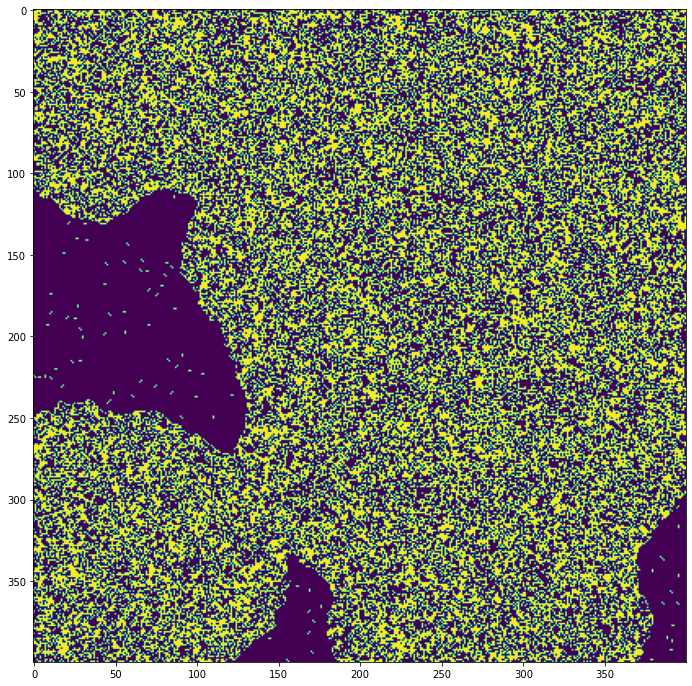

<Figure size 864x864 with 0 Axes>

In [5]:
for i in range(0,200):
    clear_output(wait=True)
    field = count_arround(field)
    plt.imshow(field, interpolation='none')
    plt.show()
    plt.figure(figsize=(12, 12))